# SVM: Kernel RBF

## O que vamos fazer?
- Gerar um dataset sintético de 2 classes (binário). 
- Pré-processar o dataset.
- Formar um modelo de classificação por SVM sobre o mesmo. 
- Comprovar a sua adequação.
- Otimizar os hiper-parâmetros do nosso modelo por validação cruzada. 
- Avaliar o nosso modelo.

Da mesma forma que tínhamos feito para a classificação de regressão logística usando Scikit-learn, vamos agora usar este quadro para resolver problemas de classificação SVM.

Em concreto, vamos usar o seu classificador SVC com o núcleo RBF (“Radial Basis Function”). O modelo Scikit-learn SVC tem uma série de núcleos disponíveis, e em particular, o núcleo gaussiano não está entre eles. Contudo, este núcleo RBF está intimamente relacionado, uma vez 
que também parte de uma classificação “radial”, e em projetos reais é uma implementação que pode ser mais eficiente e ter melhor desempenho do que o kernel Gaussiano, mais simples.


Por conseguinte, em vez do núcleo gaussiano, vamos usar a RBF. Este kernel para SVM tem 2 parâmetros:

- *C*: O inverso do parâmetro de regularização. Para valores maiores de *C*, será aceite uma margem menor entre classes se a função de decisão classificar melhor os exemplos de formação. Valores mais baixos de *C* irão tentar aumentar a margem entre classes, com uma função de decisão mais simples e, portanto, à custa de uma eventual menor precisão.
- *Gamma*: Define até onde chega a influência de cada exemplo, ou o inverso do raio de influência dos exemplos selecionados pelo modelo como landmarks. Valores mais baixos significarão uma influência que chega mais longe, e valores mais altos significarão uma influência que chega muito menos longe.

Vamos otimizar ambos os parâmetros usando a validação cruzada.

Como referência para este exercício, pode utilizar estas ligações a partir da documentação:
- [SVM: Classification](https://scikit-learn.org/stable/modules/svm.html#classification)
- [skelarn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)
- [SVM: Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)
- [Non-linear SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)

In [21]:
# TODO: Importar de todos os módulos necessários para esta célula
from sklearn.datasets import make_classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

## Criar um dataset sintético de classificação binária

Criar um dataset para classificação de 2 classes com [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

Recordar utilizar parâmetros que podemos então modificar para o número de exemplos, características e classes, se queremosque não seja ordenado ou não, um estado inicial aleatório constante, etc;

In [23]:
# TODO: Criar um dataset sintético para classificação binária

m=100
n=2

X, y = make_classification(n_samples=200,    # Número de amostras
                           n_features=2,     # Número total de features
                           n_informative=2,  # Número de features realmente informativas
                           n_redundant=0,    # Sem features redundantes
                           n_clusters_per_class=1,  # Um cluster por classe
                           n_classes=2,      # Duas classes (binário)
                           random_state=42)  

In [3]:
X

array([[-0.87292898,  0.013042  ],
       [ 1.31293463,  2.77053357],
       [ 2.34042818,  2.42099601],
       [ 2.29454774, -0.40438019],
       [ 0.94410516,  0.4772409 ],
       [-0.11959689,  0.50891314],
       [ 0.1510847 ,  0.81007677],
       [-0.00745441, -0.45284256],
       [-1.25396925,  0.06769236],
       [-0.24392415,  1.19979806],
       [-1.9208928 ,  2.9189499 ],
       [ 0.48806269,  3.50578584],
       [ 2.25751204,  1.81515089],
       [-3.12190908,  0.62220145],
       [ 1.87768113,  0.51095984],
       [ 0.46785542,  0.7871928 ],
       [ 0.48404809,  0.04843842],
       [-0.54235518,  3.49536942],
       [ 1.04235818,  1.10204918],
       [ 1.63367133,  0.59219328],
       [ 1.85756778,  1.7382647 ],
       [-2.41167954, -0.80620914],
       [ 0.87481918,  0.48815664],
       [ 0.09529002,  0.57526555],
       [-1.64994223, -0.06695917],
       [-0.65245349, -0.19158949],
       [ 2.10252081,  2.34684404],
       [ 2.9574463 ,  2.01418031],
       [-1.70056309,

In [25]:
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0])

## Pré-processar os dados

Pré-processar os dados:
- Reordená-los aleatoriamente. 
- Normalizar.
- Dividir em subsets de formação e test (usar CV por K-fold).

In [27]:
# TODO: Reordenar os dados aleatoriamente

indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]
X[:5]

array([[-1.52852845,  0.85153651],
       [ 0.82632031,  0.74117663],
       [ 0.37226849,  1.33797626],
       [-1.9208928 ,  2.9189499 ],
       [-2.40818907, -0.51139409]])

In [ ]:
# TODO: Normalizar os dados se necessário

In [33]:
# TODO: Dividi-los em subsets de formação, CV e testes.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Formar um modelo de classificação por SVM inicial

Para comprovar o funcionamento do nosso classificador SVC antes de o otimizar por validação cruzada, vamos formar um modelo inicial sobre o subset de formação e validá-lo sobre o subset de teste

Recordar usar a função [decision_function_shape](https://scikit-learn.org/stable/modules/svm.html#multi-class-classification)  para usar o esquema “um contra o resto” (“ovr”). 

Usar os valores por defeito de *C* e *gamma* para não influir sobre a sua regularização:

In [71]:
# TODO: Formar um modelo de SVC sem modificar os parâmetros de regularização sobre o subset de formação

model = SVC(decision_function_shape='ovr', kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [73]:
# TODO: Avaliar o modelo com o seu score () no subset de teste.

y_pred = model.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)
print("MSE:", mse)

Accuracy: 0.76
MSE: 0.24


Uma forma muito gráfica para compreender melhor como funcionam as SVMs e de verificar a precisão do seu modelo é representar o híper-plano que agora separa as classes, cuja margem com as classes estamos a tentar maximizar.

Para o representar, recordar que pode seguir o exemplo da [SVM: Maximum margin separating hyperplane](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html)  e modificar o seu código:

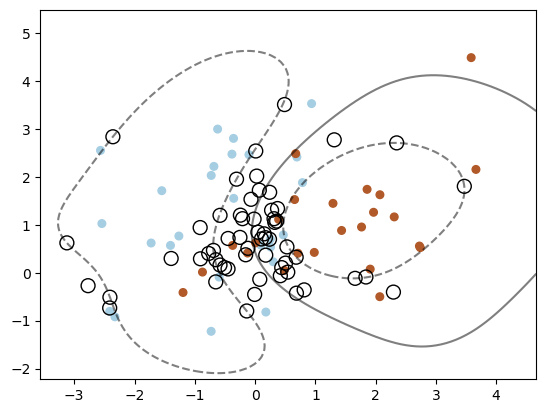

In [41]:
# TODO: Representar graficamente o hiper-plano de separação com a margem de classes

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    model,
    X_test,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

## Otimizar os hiper-parâmetros de regularização por validação cruzada

Agora vamos usar novamente o [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  para otimizar os nossos hiper-parâmetros *C* e *gamma* por K-fold. 

Queremos otimizar esses parâmetros, 2 de cada vez, e representar os seus possíveis valores de uma forma visual.

Um exemplo muito interessante que referenciávamos é [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

Modificar o seu código para otimizar o nosso modelo no nosso dataset sintéticos utilizando o K-fold para otimizar o *C* e o *gamma*. Pode usar o mesmo intervalo logarítmico de valores para estes hiper-parâmetros propostos no exercício ou modificá-los para encontrar um adequado para o seu dataset sintético.

*Nota*: Recordar que já processamos previamente o dataset seguindo os nossos métodos habituais.

In [45]:
# TODO: Otimizar os hiper-parâmetros de SVC

from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)
print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


The best parameters are {'C': 10000000.0, 'gamma': 0.0001} with a score of 0.93


*Nota*: por vezes é uma boa ideia dividir o código em diferentes células, de modo a poder modificá-las e voltar a executá-las independentemente:

## Avaliar o modelo finalmente sobre o subset de teste
- Mostrar os coeficientes e intercept do melhor modelo. 
- Avaliar o melhor modelo sobre o subset de teste inicial.
- Representar as previsões das classes para verificar os acertos, falhas e a margem entre classes no novo hiper-plano.

Para representar as previsões e o hiper-plano de margem entre classe, pode reutilizar o código com o qual avaliou o modelo inicial:

In [81]:
# TODO: Avaliar o melhor modelo sobre o subset de teste inicial
model = SVC(kernel='linear', gamma=grid.best_params_['gamma'], C=grid.best_params_['C'])
model.fit(X_train, y_train)

SVC(C=10000000.0, gamma=0.0001, kernel='linear')

In [87]:
model.coef_, model.intercept_

(array([[ 4.22019395, -0.3961797 ]]), array([0.12519754]))

In [ ]:
# TODO: Representar as previsões, comprovar a precisão e a margem entre classes
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy:", accuracy)